## Distribution Question pt. 1

How can we utilize statistical inference to state if a distribution follows normal distribution or not?

One method is a ks-test. However, we should also fall back to fundementals such as kurtosis & skewness.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

In [6]:
import pandas as pd

# load data
df = pd.read_csv("../data/winequality-red.csv")
df.head()

,sample_id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
print(len(df))

1599


<AxesSubplot:xlabel='density', ylabel='Count'>

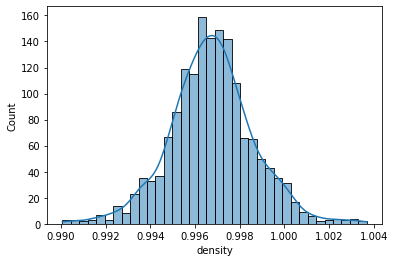

In [8]:
import seaborn as sns

# check histogram (eyeball-test)
sns.histplot(df["density"], kde=True)

# looks pretty normal no?

In [10]:
from scipy import stats

# check ks-test
stats.kstest(df["density"], stats.norm.cdf, args=(df["density"].mean(), df["density"].std()))

# but according to this ks-test, it's not...

KstestResult(statistic=0.04478706584982706, pvalue=0.0031716414529832353)

In [14]:
# check kurtosis 
# negative: < 3; lighter tails than normal distribution (less outliers and flatter peaks)
# positive: > 3; heavier tails than normal distribution (more outliers and higher peaks)
print("Excess Kurtosis", stats.kurtosis(df["density"]))

# check scipy's "kurtosis test"
# operates as a hypothesis test:
# H0: Kurtosis is that of Normal Distribution
# H1: Kurtosis is not of Normal Distribution
print("Kurtosis Test", stats.kurtosistest(df["density"]))

# check skewness
# negative: left-skewed
# positive: right-skewed
print("Skewness", stats.skew(df["density"]))

# check central tendency
print("Median", df["density"].median())
print("Mean", df["density"].median())

Kurtosis 0.9274107990478333
Kurtosis Test KurtosistestResult(statistic=5.417267299481713, pvalue=6.051683433177136e-08)
Skewness 0.07122077153539946
Median 0.99675
Mean 0.99675


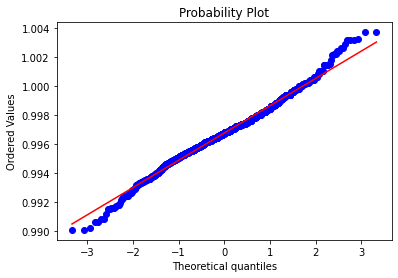

In [15]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

## QQ-Plot
stats.probplot(df["density"], dist="norm", plot=plt)
plt.show()

## Distribution Question pt. 2

Does the following column demonstrate normality?

In [20]:
import pandas as pd

# load data
df = pd.read_csv("../../week_4/data/realestate.csv")
df.head()

# remove outliers

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [21]:
print(len(df))

414


<AxesSubplot:xlabel='Y house price of unit area', ylabel='Count'>

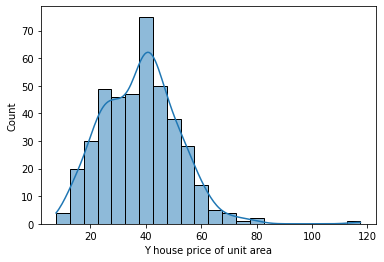

In [23]:
import seaborn as sns

# check histogram (eyeball-test)
sns.histplot(df["Y house price of unit area"], kde=True)